Line detection using OpenCV

In [11]:
import cv2
import numpy as np

In [12]:
import matplotlib
import matplotlib.pyplot as plt


In [69]:
# Load raw image, convert to grayscale
img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

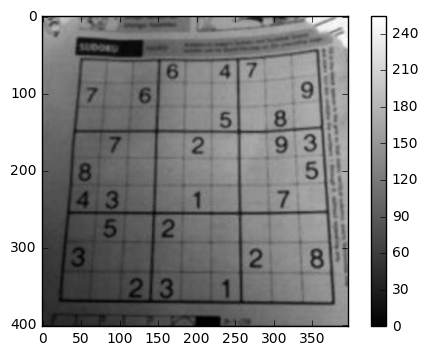

In [70]:
plt.imshow(gray,cmap=matplotlib.cm.get_cmap('gray'))
plt.colorbar()
plt.show()

## Canny edge detection

cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) → edges

image – single-channel 8-bit input image.

edges – output edge map; it has the same size and type as image.

threshold1 – first threshold for the hysteresis procedure.

threshold2 – second threshold for the hysteresis procedure.

apertureSize – aperture size for the Sobel() operator.

L2gradient – a flag, indicating whether a more accurate  L_2 norm  =\sqrt{(dI/dx)^2 + (dI/dy)^2} should be used to calculate the image gradient magnitude ( L2gradient=true ), or whether the default  L_1 norm  =|dI/dx|+|dI/dy| is enough ( L2gradient=false )

The function finds edges in the input image image and marks them in the output map edges using the Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The largest value is used to find initial segments of strong edges. See http://en.wikipedia.org/wiki/Canny_edge_detector

An example on using the canny edge detector can be found at opencv_source_code/samples/python/edge.py

In [62]:
# Canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize = 3)

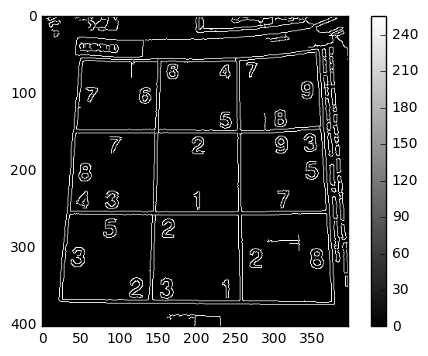

In [63]:
plt.imshow(edges,cmap=matplotlib.cm.get_cmap('gray'))
plt.colorbar()
plt.show()

In [64]:
np.unique(edges)

array([  0, 255], dtype=uint8)

## Thresholding

Tutorial:
http://docs.opencv.org/3.2.0/d7/d4d/tutorial_py_thresholding.html

cv2.threshold

Binary thresholding:

**ret,thresh = cv2.threshold(image,thrVal,maxVal,method)**

image - source image, which should be grayscale

thrVal - threshold value which is used to classify the pixel values

maxVal - value to be given if pixel value is more than (sometimes less than) the threshold value

method - one of the following methods:
* cv2.THRESH_BINARY
* cv2.THRESH_BINARY_INV
* cv2.THRESH_TRUNC
* cv2.THRESH_TOZERO
* cv2.THRESH_TOZERO_INV

ret - the threshold used

thres = the thresholded image

Adaptive thresholding:

**thresh = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst**

adaptiveMethod - one of the following methods:
* cv2.ADAPTIVE_THRESH_MEAN_C
* cv2.ADAPTIVE_GAUSSIAN_MEAN_C

thresholdType - one of the threshold types from above.

blockSize - It decides the size of neighbourhood area. It must satisfy blockSize % 2 == 1 && blockSize > 1

C - It is just a constant which is subtracted from the mean or weighted mean calculated.

In [67]:
# Binary thresholding
ret1,thresh1 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

# Adaptive thresholding
thresh2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

# Otsu's thresholding
ret3,thresh3 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

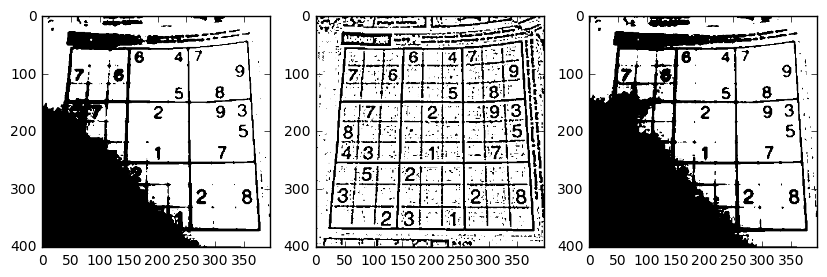

In [68]:
plt.figure(figsize=(10, 20))

plt.subplot(131)
plt.imshow(thresh1,cmap=matplotlib.cm.get_cmap('gray'))

plt.subplot(132)
plt.imshow(thresh2,cmap=matplotlib.cm.get_cmap('gray'))

plt.subplot(133)
plt.imshow(thresh3,cmap=matplotlib.cm.get_cmap('gray'))
plt.show()

## Hough transform line detection

Finds lines in a binary image using the standard Hough transform

Any line can be represented in these two terms, (\rho, \theta). So first it creates a 2D array or accumulator (to hold values of two parameters) and it is set to 0 initially. Let rows denote the \rho and columns denote the \theta. Size of array depends on the accuracy you need. Suppose you want the accuracy of angles to be 1 degree, you need 180 columns. For \rho, the maximum distance possible is the diagonal length of the image. So taking one pixel accuracy, number of rows can be diagonal length of the image.

**cv2.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn]]]) → lines**

image – 8-bit, single-channel binary source image. The image may be modified by the function.

lines – Output vector of lines. Each line is represented by a two-element vector  (\rho, \theta) .  \rho is the distance from the coordinate origin  (0,0) (top-left corner of the image).  \theta is the line rotation angle in radians ( 0 \sim \textrm{vertical line}, \pi/2 \sim \textrm{horizontal line} ).

rho – Distance resolution of the accumulator in pixels.

theta – Angle resolution of the accumulator in radians.

threshold – Accumulator threshold parameter. Only those lines are returned that get enough votes ( >\texttt{threshold} ).  It's minimum vote it should get for it to be considered as a line. Remember, number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected.

srn – For the multi-scale Hough transform, it is a divisor for the distance resolution rho . The coarse accumulator distance resolution is rho and the accurate accumulator resolution is rho/srn . If both srn=0 and stn=0 , the classical Hough transform is used. Otherwise, both these parameters should be positive.

stn – For the multi-scale Hough transform, it is a divisor for the distance resolution theta.

method –
One of the following Hough transform variants:

CV_HOUGH_STANDARD classical or standard Hough transform. Every line is represented by two floating-point numbers  (\rho, \theta) , where  \rho is a distance between (0,0) point and the line, and  \theta is the angle between x-axis and the normal to the line. Thus, the matrix must be (the created sequence will be) of CV_32FC2 type
CV_HOUGH_PROBABILISTIC probabilistic Hough transform (more efficient in case if the picture contains a few long linear segments). It returns line segments rather than the whole line. Each segment is represented by starting and ending points, and the matrix must be (the created sequence will be) of the CV_32SC4 type.
CV_HOUGH_MULTI_SCALE multi-scale variant of the classical Hough transform. The lines are encoded the same way as CV_HOUGH_STANDARD.
param1 –
First method-dependent parameter:

For the classical Hough transform, it is not used (0).
For the probabilistic Hough transform, it is the minimum line length.
For the multi-scale Hough transform, it is srn.
param2 –
Second method-dependent parameter:

For the classical Hough transform, it is not used (0).
For the probabilistic Hough transform, it is the maximum gap between line segments lying on the same line to treat them as a single line segment (that is, to join them).
For the multi-scale Hough transform, it is stn.
The function implements the standard or standard multi-scale Hough transform algorithm for line detection. See http://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm for a good explanation of Hough transform.

In [71]:
# Hough transform line detection based on edges
# img = cv2.imread('crossword.png')
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines_edges = cv2.HoughLines(edges,1,np.pi/180,150)
len(lines_edges)


17

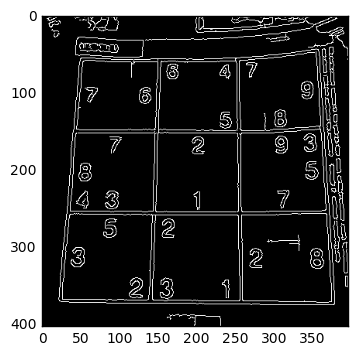

In [72]:
plt.imshow(edges,cmap=matplotlib.cm.get_cmap('gray'))
plt.show()

In [9]:
# for rho,theta in lines_edges.squeeze():
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))

#     cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

In [10]:
# cv2.imwrite('houghlines_edges.jpg',img)

True

In [125]:
# Hough transform line detection directly on image
# This doesn't work. The line detection algorithm works on binary images 

# img = cv2.imread('crossword.png')
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# lines_img = cv2.HoughLines(gray,1,np.pi/180,450)
# len(lines_img)

10

In [78]:
minLineLength = 100
maxLineGap = 10
lines_pr = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

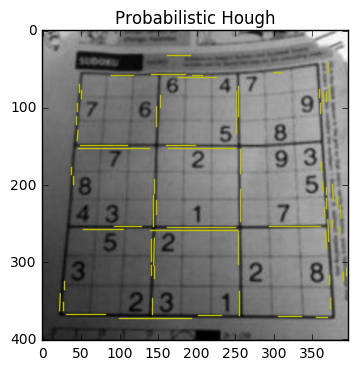

In [79]:
plt.imshow(gray,cmap=matplotlib.cm.get_cmap('gray'))
plt.title('Probabilistic Hough')
ylim = plt.gca().get_ylim()
xlim = plt.gca().get_xlim()
# plot_lines(lines_pr)
for line_idx in range(len(lines_pr)):
    line = lines_pr[line_idx][0]
    plt.plot([line[0],line[2]],[line[1],line[3]],'y')
plt.gca().set_ylim(ylim)
plt.gca().set_xlim(xlim)
plt.show()

## Contouring

In [86]:
im = cv2.imread('contour_test.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


In [103]:
contoured = cv2.drawContours(im,contours[1],-1,(0,255,0),3)


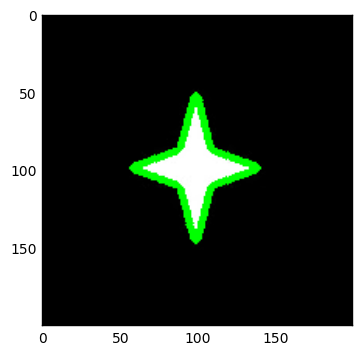

In [104]:
plt.imshow(contoured)
plt.show()